# TP 1 - Équation de la chaleur
## $\theta$-schéma

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et $\theta$-schéma :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{2\Delta x^2} -(1-\theta)\frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{2\Delta x^2}= 0. $$ 

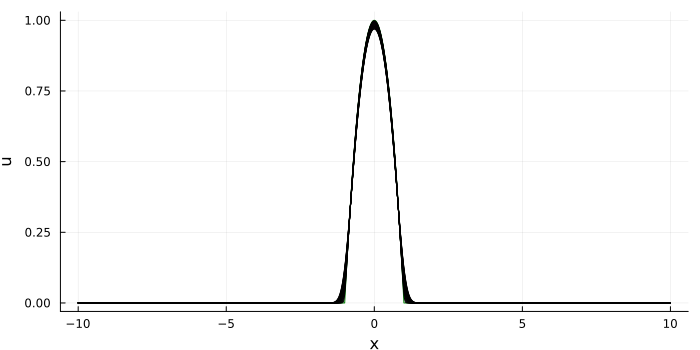

In [134]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 100*16                             # grid size (space)
Δx = 2*L/Nx                            # step size (space)
σ = 0.5                                # CFL = νΔt/Δx^2
θ = 0.9                                # Theta
Δt = 0.0001 #σ * Δx^2                         # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition


# Theta scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(σ*(θ-1)*ones(Nx), 1 .- 2*σ*(θ-1)*ones(Nx+1) ,σ*(θ-1)*ones(Nx))
B = Tridiagonal(σ*θ*ones(Nx), 1 .- 2*σ*θ*ones(Nx+1) ,σ*θ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

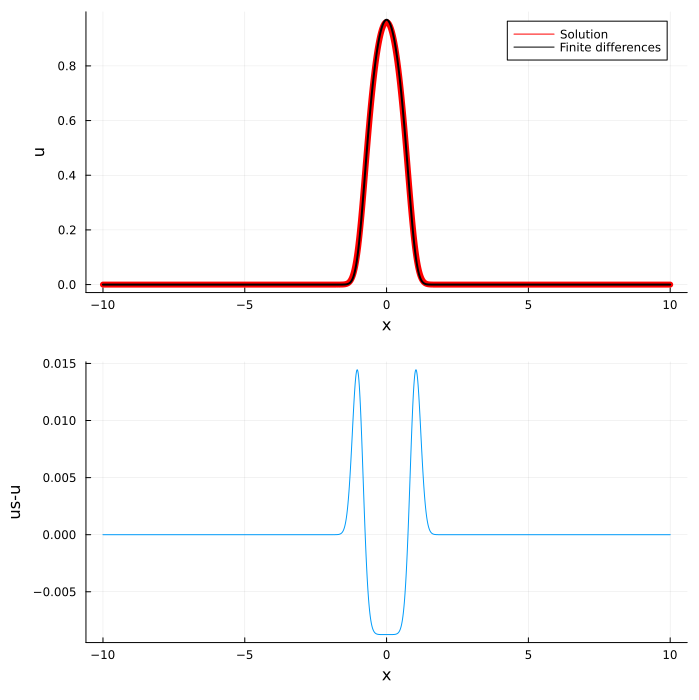

Δx: 0.0125	 Δt:0.0001	 max error: 0.014446338228394737


In [135]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

##### Theta = 0.5

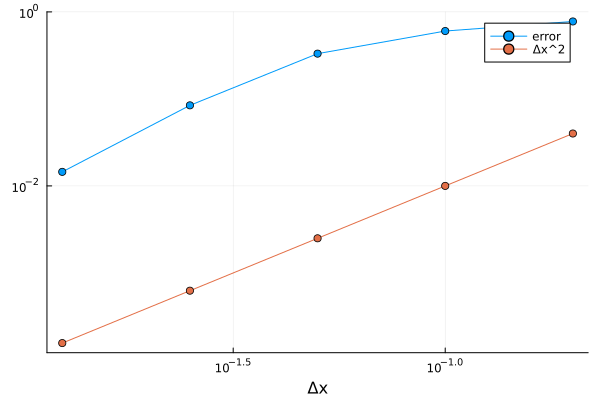

In [136]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
errx = [ 0.7759, 0.6023, 0.3311, 0.0843, 0.0145] # En fixant Δt
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

##### Theta = 0.1

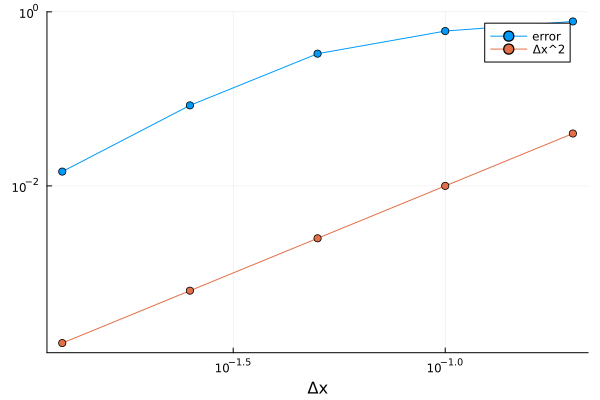

In [137]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
errx = [ 0.7757, 0.6018, 0.3307, 0.0842, 0.0146] # En fixant Δt
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

##### Theta = 0.9

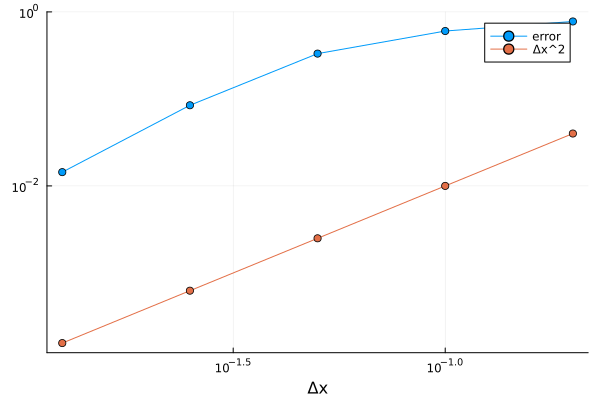

In [138]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025, 0.0125 ]
errx = [ 0.7762, 0.6027, 0.3315, 0.0845, 0.0144] # En fixant Δt
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

#### TP1 solution : Belloni Maxime, Rebaudi Elodie

- Tâche 2 : **Thêta schéma**
    1) Ecrire le $\theta$-schéma sous forme matricielle : $AU^{n+1} = BU^n$

    2) Introduire le nouveau paramètre $\theta$ dans le code et les matrices $A$ et $B$ à la place de la matrice $B$.  
    La ligne $u=B*u$ sera remplacé par $u=A$\ $(B*u)$

    3) Refaire l'étude de précision pour différentes valeurs de $\theta$

    4) Tester des différentes valeurs de $\sigma$ pour $\theta < \frac{1}{2}$, $\theta = \frac{1}{2}$, $\theta > \frac{1}{2}$,

- Réponse tâche 2 :
    Pour écrire le $\theta$-schéma sous forme matricielle on a :
    $$ A = \begin{pmatrix}
    1 - 2 \alpha (\theta-1) & \alpha (\theta - 1) & 0 & \dots & 0 \\
    \alpha (\theta - 1) & \ddots & \ddots & \ddots  & \vdots \\
    0 & \ddots & \ddots & \ddots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \alpha (\theta - 1) \\
    0 & \dots & 0 & \alpha (\theta - 1) & 1 - 2 \alpha (\theta-1)
    \end{pmatrix}$$

    $$ B = \begin{pmatrix}
    1 - 2 \alpha \theta & \alpha \theta & 0 & \dots & 0 \\
    \alpha \theta & \ddots & \ddots & \ddots  & \vdots \\
    0 & \ddots & \ddots & \ddots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \alpha \theta \\
    0 & \dots & 0 & \alpha \theta & 1 - 2 \alpha \theta
    \end{pmatrix}$$

    Comme dans la partie 1, on voit bien que l'erreur est quadratique (c'est une droite sur le graphe en échelle log-log).